In [1]:
import pandas as pd

df = pd.read_csv('data/pima-indians-diabetes.csv',
                 names = ["pregnant", "plasma", "pressure", 
         "thickness", "insulin", "BMI", "pedigree", "age", "class"])

In [2]:
print(df.head(5))

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
print(df.describe())

         pregnant      plasma    pressure   thickness     insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [5]:
print(df[['pregnant', 'class']])

     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
..        ...    ...
763        10      0
764         2      0
765         5      0
766         1      1
767         1      0

[768 rows x 2 columns]


In [6]:
print(df[['pregnant','class']].groupby(['pregnant'],
                                       as_index=False).mean().sort_values(by='pregnant', ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


In [7]:
print(df[['plasma','class']])

     plasma  class
0       148      1
1        85      0
2       183      1
3        89      0
4       137      1
..      ...    ...
763     101      0
764     122      0
765     121      0
766     126      1
767      93      0

[768 rows x 2 columns]


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
plt.figure(figsize=(12,12))

<Figure size 1200x1200 with 0 Axes>

In [10]:
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)

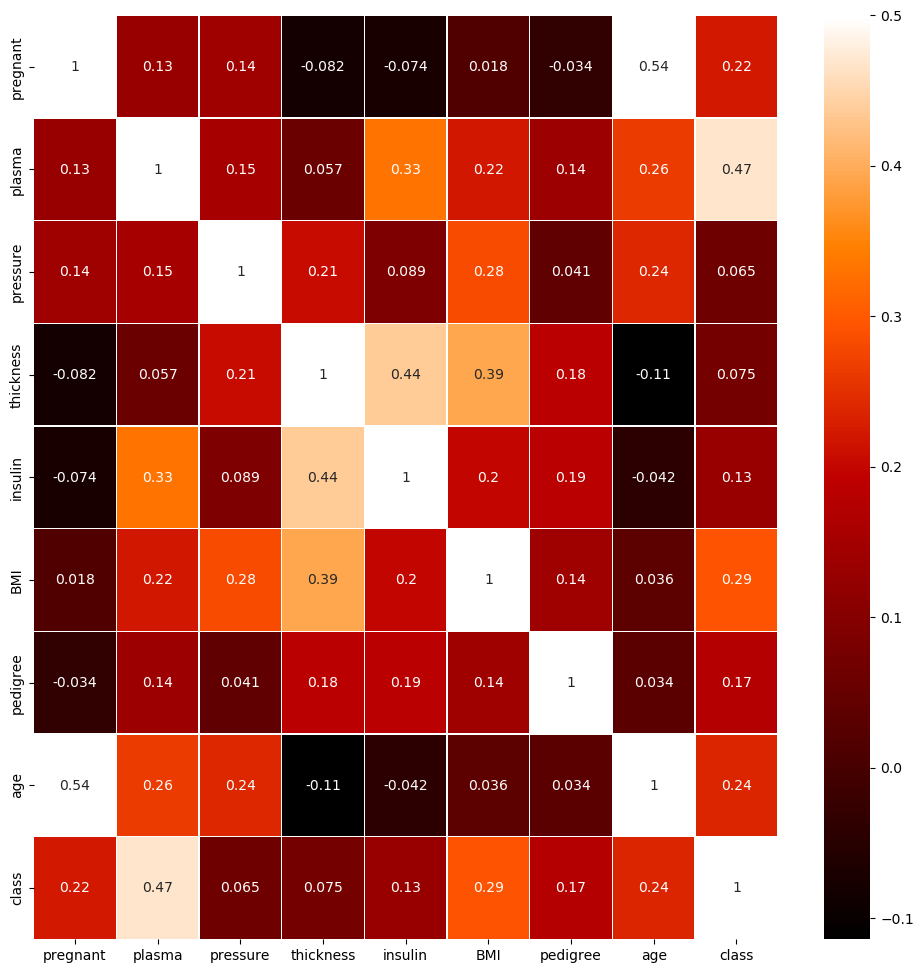

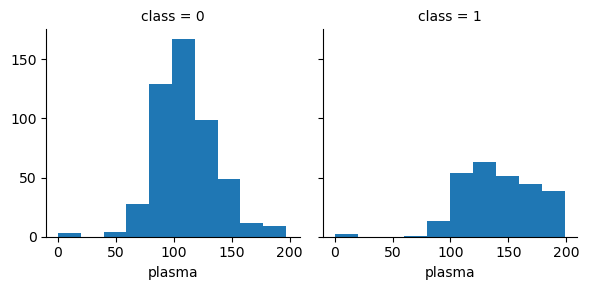

In [11]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

In [13]:
# seed 값 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from time import time
import tensorboard

In [15]:
np.random.seed(3)
tf.random.set_seed(3)

In [16]:
dataset = np.loadtxt('data/pima-indians-diabetes.csv',delimiter=',')
X = dataset[:, :8]
Y = dataset[:, 8]

In [17]:
# 모델의 설정
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [19]:
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

In [20]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X,Y, epochs=200, batch_size=10, callbacks=[tensorboard])

Train on 768 samples
Epoch 1/200
768/768 [==============================] - 1s 1ms/sample - loss: 11.4155 - accuracy: 0.6198
Epoch 2/200
768/768 [==============================] - 0s 150us/sample - loss: 6.4242 - accuracy: 0.6159
Epoch 3/200
768/768 [==============================] - 0s 152us/sample - loss: 3.6949 - accuracy: 0.5221
Epoch 4/200
768/768 [==============================] - 0s 150us/sample - loss: 2.2150 - accuracy: 0.5169
Epoch 5/200
768/768 [==============================] - 0s 156us/sample - loss: 1.3725 - accuracy: 0.5182
Epoch 6/200
768/768 [==============================] - 0s 154us/sample - loss: 0.9083 - accuracy: 0.5586
Epoch 7/200
768/768 [==============================] - 0s 150us/sample - loss: 0.7783 - accuracy: 0.5547
Epoch 8/200
768/768 [==============================] - 0s 150us/sample - loss: 0.7476 - accuracy: 0.6172
Epoch 9/200
768/768 [==============================] - 0s 147us/sample - loss: 0.7330 - accuracy: 0.6615
Epoch 10/200
768/768 [=============

In [21]:
print("Accuracy: %.4f" % (model.evaluate(X,Y)[1]))
#1를 넣으면 accuracy의 결과가 튜플로나온다

768/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================